<a href="https://colab.research.google.com/github/Fatai-soliu/Topic_modelling/blob/main/Soliu_Fatai_LDA_and_BerTopic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Importing neccessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Install dependencies

# Create a function that returns the required local i.e. UTF-8

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
!pip install bertopic
!pip install flair
!apt-get -qq install -y libfluidsynth1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


E: Package 'libfluidsynth1' has no installation candidate


In [39]:
# Load and read dataset

url = 'https://github.com/Fatai-soliu/Topic_modelling/raw/master/scopusfinaldataset.csv'

papers = pd.read_csv(url)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
0,Kini A.S.; Prema K.V.; Pai S.N.,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,Scientific Reports,https://www.scopus.com/inward/record.uri?eid=2...,"Plants get exposed to diseases, insects and fu...",NaN
1,Bassiouni M.M.; Chakrabortty R.K.; Sallam K.M....,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,Expert Systems with Applications,https://www.scopus.com/inward/record.uri?eid=2...,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...
2,Hussain E.; Mahanta L.B.; Borbora K.A.; Borah ...,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Expert Systems with Applications,https://www.scopus.com/inward/record.uri?eid=2...,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...
3,Zafar M.H.; Langås E.F.; Sanfilippo F.,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Robotics and Computer-Integrated Manufacturing,https://www.scopus.com/inward/record.uri?eid=2...,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...
4,Lee K.; Kim J.-H.; Hong H.; Jeong Y.; Ryu H.; ...,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Journal of NeuroEngineering and Rehabilitation,https://www.scopus.com/inward/record.uri?eid=2...,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...


In [41]:
papers.describe(include = 'all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
count,9713,9713,9713,10000,10000.000000,10000,10000,10000,8731
unique,9589,9610,9589,9954,NaN,3498,10000,9625,8708
top,Matsuzaka Y.; Yashiro R.,"Matsuzaka, Yasunari (56329357600); Yashiro, Ry...",57222145499; 6602324472,International Conference on Advanced Intellige...,NaN,Lecture Notes in Networks and Systems,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],Artificial Intelligence; Deep Learning; Machin...
freq,4,4,4,4,NaN,260,1,335,3
mean,NaN,NaN,NaN,NaN,2023.083000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.560841,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN


In [42]:

# summary of the columns in the dataset
# Totals rows of that is 303

papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Authors            9713 non-null   object
 1   Author full names  9713 non-null   object
 2   Author(s) ID       9713 non-null   object
 3   Title              10000 non-null  object
 4   Year               10000 non-null  int64 
 5   Source title       10000 non-null  object
 6   Link               10000 non-null  object
 7   Abstract           10000 non-null  object
 8   Author Keywords    8731 non-null   object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:

# Remove columns that does not relate to the task
# Add paper_text column

papers = papers.drop(columns=['Authors','Source title','Link'], axis=1)

#print out the first five rows of papers
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords
0,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,"Plants get exposed to diseases, insects and fu...",NaN
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...


In [44]:
# Add paper_text column
papers['paper_text'] = papers['Title'] + " " + papers['Abstract']

#print out the first five rows of papers
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
0,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,"Plants get exposed to diseases, insects and fu...",NaN,Early stage black pepper leaf disease predicti...
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...


In [45]:
# Remove missing values

papers = papers.dropna(axis='rows')

papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...


# Text Preprocessing

The Text preprocessing step will be carried out in the following step

1. Data Cleaning
2. Tokenization
3. Stopword Removal
4. Normalization
5. Text Encoding
6. Vectorization
7. Data Splitting

In [46]:
!pip install contractions
import contractions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
#Import neccessary libraries for text preprocessing

import re
from string import punctuation
import contractions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:

#Create a function for preprocessing

def clean_text(text):
    # make text lowercase
    text = str(text).lower()
    text = re.sub(r"[’']", "", text)
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove apostrophes
    text = re.sub("''", '', text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:10: DeprecationWarning: invalid escape sequence '\['
<>:12: DeprecationWarning: invalid escape sequence '\S'
<>:19: DeprecationWarning: invalid escape sequence '\w'
<>:10: DeprecationWarning: invalid escape sequence '\['
<>:12: DeprecationWarning: invalid escape sequence '\S'
<>:19: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-48-e09bdb331d18>:10: DeprecationWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
<ipython-input-48-e09bdb331d18>:12: DeprecationWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
<ipython-input-48-e09bdb331d18>:19: DeprecationWarn

In [49]:
# apply function on each text in the dataset

papers['paper_text_preprocessed'] = papers['paper_text'].apply(lambda x: clean_text(x))

papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...


# Tokenization

In [50]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
from nltk.tokenize import word_tokenize
papers['paper_words'] = papers['paper_text_preprocessed'].apply(lambda x:word_tokenize(str(x)))
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...,"[deep, learning, approaches, to, identify, ord..."
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...,"[exploring, explainable, artificial, intellige..."
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...,"[exploring, the, synergies, between, collabora..."
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...,"[deep, learning, model, for, classifying, shou..."
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...,"[employing, deep, learning, and, transfer, lea..."


# Stop words removal

In [52]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# define stopword removal function
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', "'",'used','using','one','two','also','use','us','may','ai'])

def remove_stopword(word_list):
    return [word for word in word_list if word not in stop_words]

papers['paper_words_excl_sw'] = papers['paper_words'].apply(lambda x: remove_stopword(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...,"[deep, learning, approaches, to, identify, ord...","[deep, learning, approaches, identify, order, ..."
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...,"[exploring, explainable, artificial, intellige...","[exploring, explainable, artificial, intellige..."
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...,"[exploring, the, synergies, between, collabora...","[exploring, synergies, collaborative, robotics..."
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...,"[deep, learning, model, for, classifying, shou...","[deep, learning, model, classifying, shoulder,..."
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...,"[employing, deep, learning, and, transfer, lea...","[employing, deep, learning, transfer, learning..."


# Lemmatization

After removing stopwords, I applied lemmatization technique to further preprocess the text data by converting each word to its base form

In [55]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
papers['paper_words_excl_sw'] = papers['paper_words_excl_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
papers.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
9995,"Jiang, Weiwei (57188758602)",57188758602,Cellular traffic prediction with machine learn...,2022,Cellular networks are important for the succes...,Cellular network; Clustering; Decomposition; D...,Cellular traffic prediction with machine learn...,cellular traffic prediction with machine learn...,"[cellular, traffic, prediction, with, machine,...","[cellular, traffic, prediction, machine, learn..."
9996,"Reddy, Jagadesh C (54889680100); Bhamidipati, ...",54889680100; 57563713300; 57564472600; 5756396...,KEDOP: Keratoconus early detection of progress...,2022,Purpose: To investigate a method to identifica...,artificial intelligence; collagen crosslinking...,KEDOP: Keratoconus early detection of progress...,kedop keratoconus early detection of progressi...,"[kedop, keratoconus, early, detection, of, pro...","[kedop, keratoconus, early, detection, progres..."
9997,"Hu, Bo (56233668300); Li, Jiaxi (57211006710)",56233668300; 57211006710,An Adaptive Hierarchical Energy Management Str...,2022,With the development of artificial intelligenc...,Energy management strategy (EMS); heuristic kn...,An Adaptive Hierarchical Energy Management Str...,an adaptive hierarchical energy management str...,"[an, adaptive, hierarchical, energy, managemen...","[adaptive, hierarchical, energy, management, s..."
9998,"Seetharam, Karthik (57194089320); Balla, Sudar...",57194089320; 35209479000; 57212825150; 7202073...,Applications of Machine Learning in Cardiology,2022,"In this digital era, artificial intelligence (...",Artificial intelligence; Cardiovascular Imagin...,Applications of Machine Learning in Cardiology...,applications of machine learning in cardiology...,"[applications, of, machine, learning, in, card...","[application, machine, learning, cardiology, d..."
9999,"Shi, Xu (57667114700); Wang, Long (57875628500...",57667114700; 57875628500; 56984221600; 5773134...,GCLDNet: Gastric cancer lesion detection netwo...,2022,Background: Analysis of histopathological slic...,artificial intelligence; attention feature fus...,GCLDNet: Gastric cancer lesion detection netwo...,gcldnet gastric cancer lesion detection networ...,"[gcldnet, gastric, cancer, lesion, detection, ...","[gcldnet, gastric, cancer, lesion, detection, ..."


# Visualize the data using wordcloud package

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


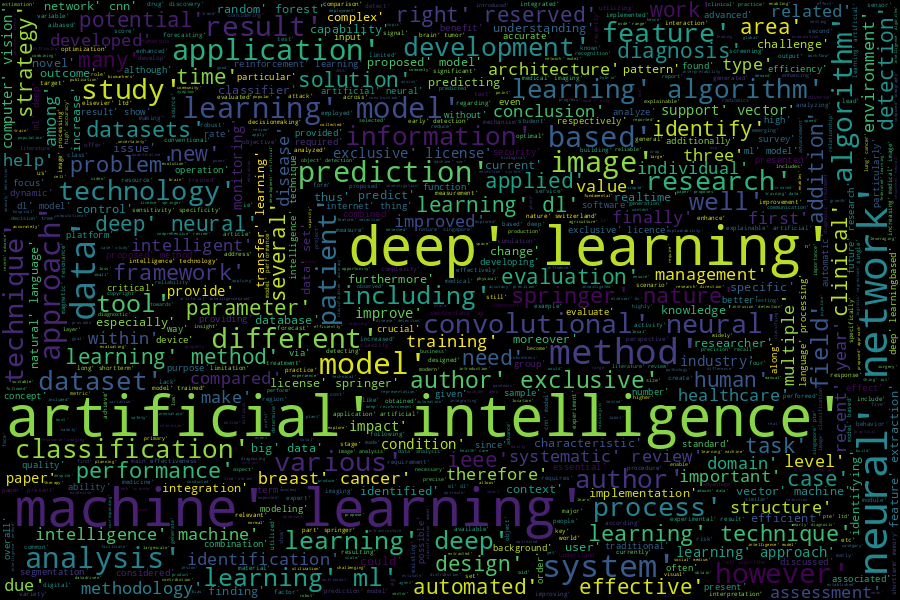

In [56]:
# Visualize the data using wordcloud package
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join((str(l) for l in papers['paper_words_excl_sw']))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=3000, contour_width=3, contour_color='steelblue', width = 900, height = 600)

#Generate a word cloud
wordcloud.generate(long_string)

#Visualize the word cloud
wordcloud.to_image()

# LDA Analysis

In [57]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


data = papers['paper_words_excl_sw'].tolist()
data_words = list(sent_to_words(data))


print(data_words[:2][0][:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['deep', 'learning', 'approach', 'identify', 'order', 'status', 'complex', 'supply', 'chain', 'emergence']


In [58]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)]


# LDA model training

In [59]:

from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"model" + 0.010*"study" + 0.010*"clinical" + 0.010*"patient" + '
  '0.007*"learning" + 0.007*"artificial" + 0.007*"data" + 0.006*"deep" + '
  '0.005*"performance" + 0.005*"intelligence"'),
 (1,
  '0.012*"learning" + 0.009*"machine" + 0.009*"data" + 0.008*"method" + '
  '0.008*"artificial" + 0.007*"intelligence" + 0.006*"deep" + 0.005*"result" + '
  '0.005*"system" + 0.005*"technique"'),
 (2,
  '0.016*"learning" + 0.012*"deep" + 0.011*"artificial" + 0.010*"network" + '
  '0.010*"intelligence" + 0.009*"disease" + 0.008*"review" + 0.007*"method" + '
  '0.007*"machine" + 0.007*"cancer"'),
 (3,
  '0.011*"intelligence" + 0.010*"learning" + 0.010*"artificial" + 0.009*"data" '
  '+ 0.007*"patient" + 0.007*"machine" + 0.006*"deep" + 0.006*"healthcare" + '
  '0.006*"disease" + 0.005*"application"'),
 (4,
  '0.021*"learning" + 0.017*"model" + 0.012*"machine" + 0.011*"deep" + '
  '0.011*"artificial" + 0.010*"data" + 0.008*"intelligence" + 0.008*"method" + '
  '0.007*"research" + 0.00

# Analyzing LDA model

Now, let's visualize the topics to identify patterns for interpretability using pyLDAvis

In [60]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('content_'+str(num_topics) + '.pickle')

if not os.path.exists(LDAvis_data_filepath):
    # Prepare the LDA visualization data
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    # Save the prepared data to disk
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.016269  0.033957       1        1  23.070838
4      0.011459  0.013198       2        1  16.964795
5      0.072393  0.005293       3        1  15.283537
6     -0.011405  0.019072       4        1  10.183089
8     -0.038118  0.004562       5        1   9.463418
9     -0.030070  0.013835       6        1   9.428411
0     -0.027688  0.012113       7        1   6.668846
1      0.012159  0.007349       8        1   4.760918
7      0.038261 -0.058454       9        1   2.630447
3     -0.043260 -0.050927      10        1   1.545703, topic_info=           Term          Freq         Total Category  logprob  loglift
3            ai  10235.000000  10235.000000  Default  30.0000  30.0000
62     learning  20608.000000  20608.000000  Default  29.0000  29.0000
71        model  16609.000000  16609.000000  Default  28.0000  28.0000
10   artificial  10649.000000  10649.000000  Default  27.0000  27.0000
172       image   6543.000000   6543.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
11       author     58.280831   3967.380344  Topic10  -5.8004  -0.0509
86      predict     46.191968   1481.449598  Topic10  -6.0328   0.7017
373        time     48.041455   2412.472332  Topic10  -5.9936   0.2533
151   diagnosis     47.658376   3354.346316  Topic10  -6.0016  -0.0843
209   technique     45.555442   5447.327419  Topic10  -6.0467  -0.6143

[876 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
2160       1  0.148227  ablation
2160       2  0.044468  ablation
2160       3  0.029645  ablation
2160       4  0.044468  ablation
2160       5  0.029645  ablation
...      ...       ...       ...
22322     10  0.743717     youth
11980      1  0.912163  zoonotic
11980      3  0.027641  zoonotic
11980      6  0.027641  zoonotic
20572      6  0.890905       μgl

[3133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 6, 7, 9, 10, 1, 2, 8, 4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


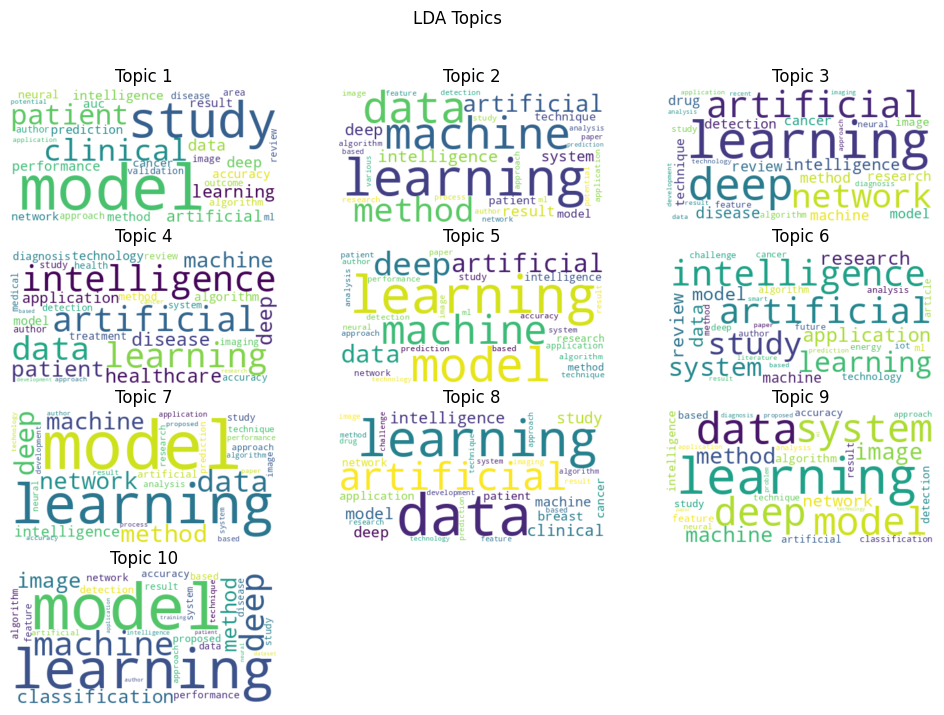

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.tight_layout(pad=3.0)
plt.suptitle("LDA Topics")

num_topics = lda_model.num_topics

num_cols = 3
num_rows = (num_topics + num_cols - 1) // num_cols

for i in range(1, num_topics + 1):
    plt.subplot(num_rows, num_cols, i)
    wordcloud = WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i - 1, topn=30)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Topic " + str(i))
    plt.axis("off")

plt.show()

# BerTopic

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Clustering model
# hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 5,
# metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=9)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model,
#                        embedding_model=stacked_embeddings,min_topic_size=5, n_gram_range=(1, 3),diversity=0.8)#vectorizer_model=vectorizer_model)# Other options for embedding_model are sentence_model, hf_model,roberta_model

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(papers_nips['abstract_lemmatized'])#abstract_lemmatized

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

In [ ]:

# Get top 10 terms for a topic
topic_model.get_topic(0)

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [ ]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
papers_nips['topic_prediction'] = topic_prediction
# Take a look at the data
papers_nips.head()

In [ ]:
# New data for the review
new_review = "I like the new headphone. Its sound quality is great."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics);
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

In [ ]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

In [ ]:
# Save the topic model
topic_model.save("papers_nips_topic_model")
# Load the topic model
my_model = BERTopic.load("papers_nips_topic_model")